# Analysis of houses in different regions

We use the combined data tsv (which includes different data from [numbeo](https://www.numbeo.com/cost-of-living/prices_by_city.jsp)). We can rank different cities based on region, affordability and other metrics.

In [24]:
import pandas as pd
# import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display

In [25]:
df = pd.read_csv("numbeo_data_JAN25/combined_data.tsv", sep='\t', header=0)
df.columns

Index(['City', 'Average Monthly Net Salary (After Tax) (in USD)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate (in USD)',
       'Apartment (1 bedroom) in City Centre (in USD)',
       'Apartment (1 bedroom) Outside of Centre (in USD)',
       'Apartment (3 bedrooms) in City Centre (in USD)',
       'Apartment (3 bedrooms) Outside of Centre (in USD)',
       'Price per Square Meter to Buy Apartment in City Centre (in USD)',
       'Price per Square Meter to Buy Apartment Outside of Centre (in USD)',
       'Region', 'Continent'],
      dtype='object')

In [26]:
df.head()

,City,Average Monthly Net Salary (After Tax) (in USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate (in USD)",Apartment (1 bedroom) in City Centre (in USD),Apartment (1 bedroom) Outside of Centre (in USD),Apartment (3 bedrooms) in City Centre (in USD),Apartment (3 bedrooms) Outside of Centre (in USD),Price per Square Meter to Buy Apartment in City Centre (in USD),Price per Square Meter to Buy Apartment Outside of Centre (in USD),Region,Continent
0,"San Francisco, CA, United States",7531.53,6.57,3199.85,2830.43,5703.28,4623.81,11067.61,10173.76,Northern America,America
1,"Zurich, Switzerland",7339.69,2.30,2471.93,1979.89,4396.38,3318.12,24071.34,16644.22,Western Europe,Europe
2,"Geneva, Switzerland",7108.17,2.48,2082.56,1857.12,4243.66,3413.59,17984.51,14601.31,Western Europe,Europe
3,"Seattle, WA, United States",6674.67,6.42,2289.71,1844.44,4580.73,3436.77,7277.16,5477.16,Northern America,America
4,"Lausanne, Switzerland",6372.50,2.50,1678.18,1332.70,3109.76,2717.57,17273.76,11613.44,Western Europe,Europe


## Recoup Duration

As a landlord, it is important to know the amount of time it takes to make even ("recoup your investement"). That is equivelant to doubling the money (ceteris paribus, i.e. the house prices don't increase, which does not happen in real life).

In [27]:
# what are the places that are more worth buying and house and then renting it out?
# what are the fastest cities to recoup your investment? (the higher the rent + the lower the price to buy => the faster the recoup)

df['Recoup Ratio'] = (
    df['Apartment (1 bedroom) in City Centre (in USD)'] / 
    df['Price per Square Meter to Buy Apartment in City Centre (in USD)']
)
df = df.sort_values('Recoup Ratio', ascending=False)

best_recoup, worst_recoup = df['Recoup Ratio'].iloc[0], df['Recoup Ratio'].iloc[-1]

print(f"{best_recoup=:.4f} vs {worst_recoup=:.4f} ({best_recoup/worst_recoup} x faster)")

best_recoup=0.8235 vs worst_recoup=0.0446 (18.464314348090987 x faster)


In [28]:
# what are the places that are more worth buying and house and then renting it out?
# what are the fastest cities to recoup your investment? (the higher the rent + the lower the price to buy => the faster the recoup)

df['Recoup Duration Factor'] = (
    df['Price per Square Meter to Buy Apartment in City Centre (in USD)'] / 
        df['Apartment (1 bedroom) in City Centre (in USD)']) # the lower the duration, the better


df = df.sort_values('Recoup Duration Factor', ascending=True)

# assuming average apartment (1 bedroom) has between 45 to 90 square meters (let's say 60 sq.m.)
# and then calculate years of recoup (divide by 12 months)
df['Recoup Initial investement'] = df['Price per Square Meter to Buy Apartment in City Centre (in USD)']*60
df['Recoup Duration Estimate'] = df['Recoup Duration Factor']*60 / 12

best_recoup_dur, worst_recoup_dur = df['Recoup Duration Estimate'].iloc[0], df['Recoup Duration Estimate'].iloc[-1]
print(f"{best_recoup_dur=:2.1f} vs {worst_recoup_dur=:.1f} ({worst_recoup_dur/best_recoup_dur:.1f} x faster) (same as before)")

best_recoup_dur=6.1 vs worst_recoup_dur=112.1 (18.5 x faster) (same as before)


We conclude that there is huge difference between the time to recoup.
Essentially this is the time for 100% profit (or doubling). The fastest time for recoup is 3 years and the slowest time is 56 year. 

The calculation above is a generous estimate, it doesn't account renovation costs, costs for fixing during lifetime of house, initial cost to buy, ...

Also, for recoup we don't get increase in value into account (Ceteris paribus, all else being equal).

In [29]:
# ceteris paribus, recoup duration in years for south european cities
pd.set_option('display.max_rows', 200)
# df[ df['Region'] == 'Southern Europe' ][['City', 'Recoup Duration Estimate', 'Recoup Initial investement']]
df[ df['Continent'] == 'Europe' ][['City', 'Recoup Duration Estimate', 'Recoup Initial investement']]

# random_region = random.choice(list(set(df['Region'])))
# df[ df['Region'] == random_region ][['City', 'Recoup Duration Estimate']]

,City,Recoup Duration Estimate,Recoup Initial investement
101,"Belfast, United Kingdom",12.900904,167581.2
76,"Cork, Ireland",13.352298,253468.8
72,"Glasgow, United Kingdom",13.900720,213601.8
118,"Valencia, Spain",14.947543,196785.6
99,"Liverpool, United Kingdom",15.078925,192811.8
210,"Chisinau, Moldova",15.605542,107790.6
53,"Reykjavik, Iceland",16.209990,382861.8
64,"Rotterdam, Netherlands",16.285323,315001.8
75,"Groningen, Netherlands",16.362359,202645.2
54,"Dublin, Ireland",17.382930,427676.4


The best combination is in a city with small recoup duration and low initial investement.

[Text(0.5, 1.0, 'Recoup Duration Estimate Histogram'),
 Text(0, 0.5, 'Amount of cities')]

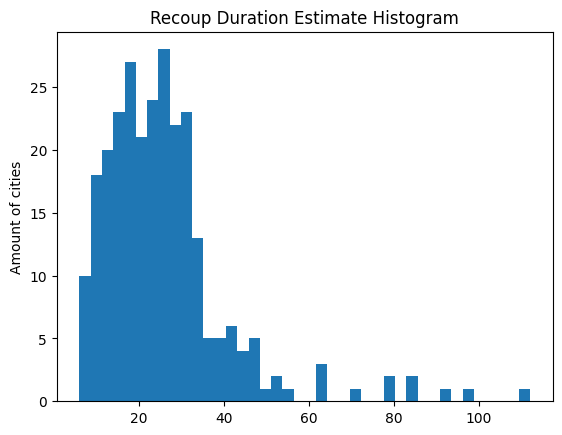

In [30]:
plt.hist(df['Recoup Duration Estimate'], bins=40)
plt.gca().set(title='Recoup Duration Estimate Histogram', ylabel='Amount of cities')


In [31]:
df.tail(15)

,City,Average Monthly Net Salary (After Tax) (in USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate (in USD)",Apartment (1 bedroom) in City Centre (in USD),Apartment (1 bedroom) Outside of Centre (in USD),Apartment (3 bedrooms) in City Centre (in USD),Apartment (3 bedrooms) Outside of Centre (in USD),Price per Square Meter to Buy Apartment in City Centre (in USD),Price per Square Meter to Buy Apartment Outside of Centre (in USD),Region,Continent,Recoup Ratio,Recoup Duration Factor,Recoup Initial investement,Recoup Duration Estimate
1,"Zurich, Switzerland",7339.69,2.30,2471.93,1979.89,4396.38,3318.12,24071.34,16644.22,Western Europe,Europe,0.102692,9.737873,1444280.4,48.689364
4,"Lausanne, Switzerland",6372.50,2.50,1678.18,1332.70,3109.76,2717.57,17273.76,11613.44,Western Europe,Europe,0.097152,10.293151,1036425.6,51.465755
179,"Mumbai, India",896.58,9.04,659.13,353.82,1798.23,908.28,6792.27,3201.42,Southern Asia,Asia,0.097041,10.304902,407536.2,51.524510
63,"Tel Aviv-Yafo, Israel",3419.29,5.30,1697.93,1259.44,3089.52,2219.56,18662.58,13178.20,Western Asia,Asia,0.090980,10.991372,1119754.8,54.956859
186,"Chengdu, China",839.42,4.42,309.44,166.30,599.71,303.49,3835.17,1982.84,Eastern Asia,Asia,0.080685,12.393905,230110.2,61.969526
52,"Hong Kong, Hong Kong (China)",3619.81,4.01,2089.58,1558.40,4664.04,3203.58,26361.11,16147.45,Eastern Asia,Asia,0.079268,12.615506,1581666.6,63.077532
261,"Kathmandu, Nepal",233.81,12.84,177.39,95.63,292.47,186.37,2265.64,1167.39,Southern Asia,Asia,0.078296,12.772084,135938.4,63.860421
170,"Suzhou, China",993.46,4.02,428.14,221.37,1082.15,522.44,6006.83,3344.71,Eastern Asia,Asia,0.071276,14.030060,360409.8,70.150301
138,"Beijing, China",1541.14,3.85,917.85,503.04,2049.91,1100.34,14594.48,6831.31,Eastern Asia,Asia,0.062890,15.900725,875668.8,79.503623
164,"Hangzhou, China",1125.74,4.04,511.33,279.37,1122.95,658.31,8144.40,4336.33,Eastern Asia,Asia,0.062783,15.927874,488664.0,79.639372


Looking at this we understand that landlording isn't really worth it in China and India. Probably there is governmental limit in rents.